_Briefly explain the rationale behind each KPI and why you have chosen it_

Another key performance indicator is the quality of the bikes.   
We can assume that if a bike is not used for 1 week or longer it is probably broken or can't be accessed.
The percentage of bikes that overstep this threshold value can tells us the quality of the fleet.

_Calculate hourly KPIs for the two cities in your dataset and visualize them over time._

In [25]:
# import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime
from datetime import timedelta
import math
import random
import timeit
import pickle

In [26]:
marburg = pd.read_pickle('../0_data/marburg_clean.pkl')
duisburg = pd.read_pickle('../0_data/duisburg_clean.pkl')

## Duisburg

In [27]:
duisburg = duisburg.sort_values(['datetime'])
duisburg = duisburg.reset_index()
duisburg

,datetime,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins
0,2019-01-20 00:31:00,2019-01-20,00:31:00,51129,duisburg,"(51.4393, 6.7829)","(51.4294, 6.7772)",6,0,10
1,2019-01-20 01:11:00,2019-01-20,01:11:00,50113,duisburg,"(51.4319, 6.7784)","(51.4341, 6.7627)",6,1,13
2,2019-01-20 01:21:00,2019-01-20,01:21:00,51465,duisburg,"(51.4281, 6.7792)","(51.432, 6.7712)",6,1,121
3,2019-01-20 01:54:00,2019-01-20,01:54:00,51129,duisburg,"(51.4304, 6.7748)","(51.4223, 6.7918)",6,1,9
4,2019-01-20 05:37:00,2019-01-20,05:37:00,51299,duisburg,"(51.4294, 6.7772)","(51.4245, 6.7815)",6,5,6
...,...,...,...,...,...,...,...,...,...,...
131914,2020-01-20 22:48:00,2020-01-20,22:48:00,52171,duisburg,"(51.4283, 6.7856)","(51.4294, 6.7772)",0,22,6
131915,2020-01-20 23:22:00,2020-01-20,23:22:00,51585,duisburg,"(51.4558, 6.735)","(51.4367, 6.7576)",0,23,15
131916,2020-01-20 23:24:00,2020-01-20,23:24:00,501570,duisburg,"(51.4319, 6.7784)","(51.4302, 6.762)",0,23,7
131917,2020-01-20 23:33:00,2020-01-20,23:33:00,501533,duisburg,"(51.4104, 6.7521)","(51.4178, 6.7575)",0,23,18


In [28]:
def calc_length(df):
    # hier wird die differenz zwischen den datimes berechnet
    # es ist wichtig, dass davor sortiert wurde
    # periods = -1, heisst dass die differenz immer mit der row darunter berechnet wird
    df['diff'] = df['datetime'].diff(periods=-1)
    return df

In [29]:
duisburg_diff = duisburg.groupby(['b_number'], sort=False).apply(calc_length)
duisburg_diff

,datetime,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff
0,2019-01-20 00:31:00,2019-01-20,00:31:00,51129,duisburg,"(51.4393, 6.7829)","(51.4294, 6.7772)",6,0,10,-1 days +22:37:00
1,2019-01-20 01:11:00,2019-01-20,01:11:00,50113,duisburg,"(51.4319, 6.7784)","(51.4341, 6.7627)",6,1,13,-165 days +19:00:00
2,2019-01-20 01:21:00,2019-01-20,01:21:00,51465,duisburg,"(51.4281, 6.7792)","(51.432, 6.7712)",6,1,121,-2 days +18:43:00
3,2019-01-20 01:54:00,2019-01-20,01:54:00,51129,duisburg,"(51.4304, 6.7748)","(51.4223, 6.7918)",6,1,9,-1 days +19:41:00
4,2019-01-20 05:37:00,2019-01-20,05:37:00,51299,duisburg,"(51.4294, 6.7772)","(51.4245, 6.7815)",6,5,6,-1 days +17:31:00
...,...,...,...,...,...,...,...,...,...,...,...
131914,2020-01-20 22:48:00,2020-01-20,22:48:00,52171,duisburg,"(51.4283, 6.7856)","(51.4294, 6.7772)",0,22,6,NaT
131915,2020-01-20 23:22:00,2020-01-20,23:22:00,51585,duisburg,"(51.4558, 6.735)","(51.4367, 6.7576)",0,23,15,NaT
131916,2020-01-20 23:24:00,2020-01-20,23:24:00,501570,duisburg,"(51.4319, 6.7784)","(51.4302, 6.762)",0,23,7,NaT
131917,2020-01-20 23:33:00,2020-01-20,23:33:00,501533,duisburg,"(51.4104, 6.7521)","(51.4178, 6.7575)",0,23,18,NaT


In [30]:
# beispiel um zu gucken ob es geklappt hat
# dadurch dass wir  vergangenheit - zukunft gerechnet haben sehen die timedeltas was seltsam aus
# -1 days +21:28 bedeuter nichts anderes als -3 1/2 stunden
# wir sehen hier, dass logischerweise der letzte eintrag immer NaT hat
duisburg_diff.sort_values(['b_number','datetime'])[duisburg_diff['b_number']==683]

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,datetime,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff
27613,2019-05-27 14:48:00,2019-05-27,14:48:00,683,duisburg,"(51.426, 6.7649)","(51.4283, 6.7856)",0,14,73,-1 days +21:28:00
27675,2019-05-27 17:20:00,2019-05-27,17:20:00,683,duisburg,"(51.4283, 6.7856)","(51.4314, 6.7591)",0,17,44,-1 days +09:01:00
27829,2019-05-28 08:19:00,2019-05-28,08:19:00,683,duisburg,"(51.4314, 6.7591)","(51.4333, 6.7684)",1,8,6,-8 days +23:06:00
30425,2019-06-04 09:13:00,2019-06-04,09:13:00,683,duisburg,"(51.4341, 6.7627)","(51.4314, 6.7591)",1,9,12,-1 days +00:05:00
30907,2019-06-05 09:08:00,2019-06-05,09:08:00,683,duisburg,"(51.4314, 6.7591)","(51.4393, 6.7829)",2,9,52,-1 days +22:33:00
30940,2019-06-05 10:35:00,2019-06-05,10:35:00,683,duisburg,"(51.4393, 6.7829)","(51.4306, 6.7735)",2,10,41,NaT


In [31]:
duisburg['datetime'].max()

Timestamp('2020-01-20 23:48:00')

In [32]:
def fill_NaT(row):
    if pd.isnull(row['diff']):
        end = pd.Timestamp(year=2020, month=1, day=21)
        row['diff'] = end - row['datetime']
    return row

In [33]:
# wir fuellen hier die NaT values auf mit dem letzten Datum, von dem wir Daten haben
duisburg_diff = duisburg_diff.apply(fill_NaT, axis=1)

In [34]:
duisburg_diff[duisburg_diff['b_number']==683]

,datetime,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff
27613,2019-05-27 14:48:00,2019-05-27,14:48:00,683,duisburg,"(51.426, 6.7649)","(51.4283, 6.7856)",0,14,73,-1 days +21:28:00
27675,2019-05-27 17:20:00,2019-05-27,17:20:00,683,duisburg,"(51.4283, 6.7856)","(51.4314, 6.7591)",0,17,44,-1 days +09:01:00
27829,2019-05-28 08:19:00,2019-05-28,08:19:00,683,duisburg,"(51.4314, 6.7591)","(51.4333, 6.7684)",1,8,6,-8 days +23:06:00
30425,2019-06-04 09:13:00,2019-06-04,09:13:00,683,duisburg,"(51.4341, 6.7627)","(51.4314, 6.7591)",1,9,12,-1 days +00:05:00
30907,2019-06-05 09:08:00,2019-06-05,09:08:00,683,duisburg,"(51.4314, 6.7591)","(51.4393, 6.7829)",2,9,52,-1 days +22:33:00
30940,2019-06-05 10:35:00,2019-06-05,10:35:00,683,duisburg,"(51.4393, 6.7829)","(51.4306, 6.7735)",2,10,41,229 days 13:25:00


In [118]:
duisburg_diff['is_broken'] = duisburg_diff['diff'] < timedelta(days=-28) 

In [119]:
duisburg_diff

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff,is_broken
datetime,,,,,,,,,,,
2019-01-20 00:31:00,2019-01-20,00:31:00,51129,duisburg,"(51.4393, 6.7829)","(51.4294, 6.7772)",6,0,10,-1 days +22:37:00,False
2019-01-20 01:11:00,2019-01-20,01:11:00,50113,duisburg,"(51.4319, 6.7784)","(51.4341, 6.7627)",6,1,13,-165 days +19:00:00,True
2019-01-20 01:21:00,2019-01-20,01:21:00,51465,duisburg,"(51.4281, 6.7792)","(51.432, 6.7712)",6,1,121,-2 days +18:43:00,False
2019-01-20 01:54:00,2019-01-20,01:54:00,51129,duisburg,"(51.4304, 6.7748)","(51.4223, 6.7918)",6,1,9,-1 days +19:41:00,False
2019-01-20 05:37:00,2019-01-20,05:37:00,51299,duisburg,"(51.4294, 6.7772)","(51.4245, 6.7815)",6,5,6,-1 days +17:31:00,False
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-20 22:48:00,2020-01-20,22:48:00,52171,duisburg,"(51.4283, 6.7856)","(51.4294, 6.7772)",0,22,6,0 days 01:12:00,False
2020-01-20 23:22:00,2020-01-20,23:22:00,51585,duisburg,"(51.4558, 6.735)","(51.4367, 6.7576)",0,23,15,0 days 00:38:00,False
2020-01-20 23:24:00,2020-01-20,23:24:00,501570,duisburg,"(51.4319, 6.7784)","(51.4302, 6.762)",0,23,7,0 days 00:36:00,False


In [120]:
duisburg_diff = duisburg_diff.set_index('datetime')
duisburg_diff

KeyError: "None of ['datetime'] are in the columns"

In [121]:
duisburg_diff.resample('h')['is_broken'].sum()

datetime
2019-01-20 00:00:00    0.0
2019-01-20 01:00:00    1.0
2019-01-20 02:00:00    0.0
2019-01-20 03:00:00    0.0
2019-01-20 04:00:00    0.0
                      ... 
2020-01-20 19:00:00    0.0
2020-01-20 20:00:00    0.0
2020-01-20 21:00:00    0.0
2020-01-20 22:00:00    0.0
2020-01-20 23:00:00    0.0
Freq: H, Name: is_broken, Length: 8784, dtype: float64

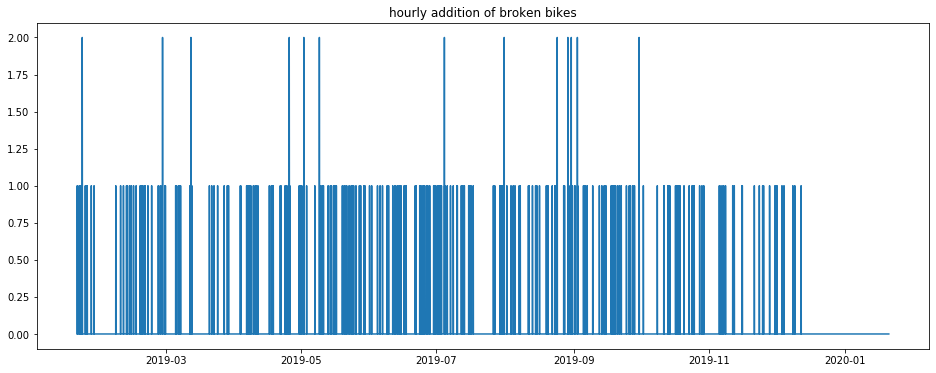

In [122]:

fig,ax = plt.subplots(figsize=(16,6))

ax.plot(duisburg_diff.resample('h')['is_broken'].sum())
ax.set_title("hourly addition of broken bikes")

plt.show()

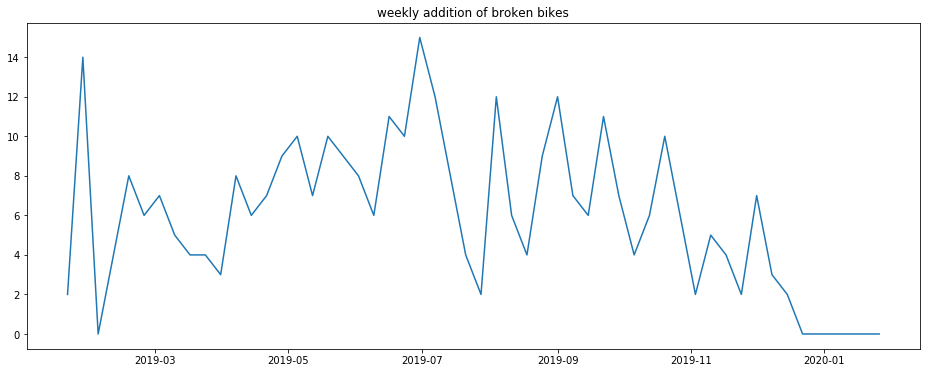

In [123]:

fig,ax = plt.subplots(figsize=(16,6))

ax.plot(duisburg_diff.resample('w')['is_broken'].sum())
ax.set_title("weekly addition of broken bikes")

plt.show()

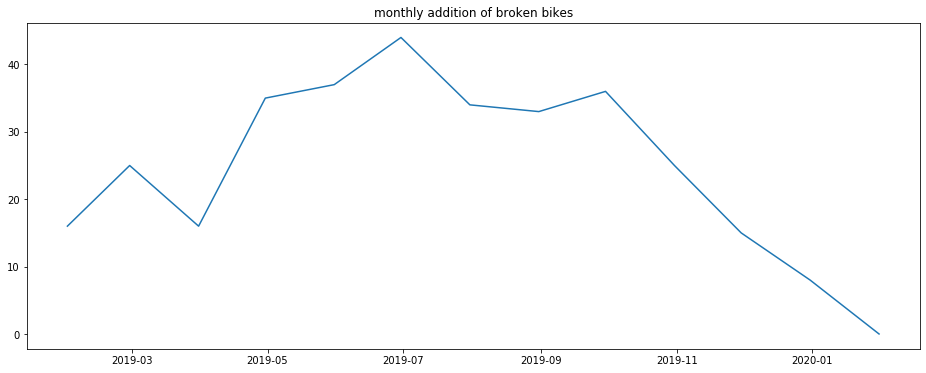

In [124]:

fig,ax = plt.subplots(figsize=(16,6))

ax.plot(duisburg_diff.resample('m')['is_broken'].sum())
ax.set_title("monthly addition of broken bikes")

plt.show()

In [125]:
duisburg_diff.resample('m')['is_broken'].sum()

datetime
2019-01-31    16.0
2019-02-28    25.0
2019-03-31    16.0
2019-04-30    35.0
2019-05-31    37.0
2019-06-30    44.0
2019-07-31    34.0
2019-08-31    33.0
2019-09-30    36.0
2019-10-31    25.0
2019-11-30    15.0
2019-12-31     8.0
2020-01-31     0.0
Freq: M, Name: is_broken, dtype: float64

_Which trends do you observe? How do you explain them?_

The Trend of the Bikes getting broken in a week is a constant up and down with peaks about 10 to 15 broken bikes per week.   
When we take a look at the monthly curve we can see that around october until march there are less broken bikes per month (<33) than in the more summmerly months.

In [126]:
duisburg_diff

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff,is_broken
datetime,,,,,,,,,,,
2019-01-20 00:31:00,2019-01-20,00:31:00,51129,duisburg,"(51.4393, 6.7829)","(51.4294, 6.7772)",6,0,10,-1 days +22:37:00,False
2019-01-20 01:11:00,2019-01-20,01:11:00,50113,duisburg,"(51.4319, 6.7784)","(51.4341, 6.7627)",6,1,13,-165 days +19:00:00,True
2019-01-20 01:21:00,2019-01-20,01:21:00,51465,duisburg,"(51.4281, 6.7792)","(51.432, 6.7712)",6,1,121,-2 days +18:43:00,False
2019-01-20 01:54:00,2019-01-20,01:54:00,51129,duisburg,"(51.4304, 6.7748)","(51.4223, 6.7918)",6,1,9,-1 days +19:41:00,False
2019-01-20 05:37:00,2019-01-20,05:37:00,51299,duisburg,"(51.4294, 6.7772)","(51.4245, 6.7815)",6,5,6,-1 days +17:31:00,False
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-20 22:48:00,2020-01-20,22:48:00,52171,duisburg,"(51.4283, 6.7856)","(51.4294, 6.7772)",0,22,6,0 days 01:12:00,False
2020-01-20 23:22:00,2020-01-20,23:22:00,51585,duisburg,"(51.4558, 6.735)","(51.4367, 6.7576)",0,23,15,0 days 00:38:00,False
2020-01-20 23:24:00,2020-01-20,23:24:00,501570,duisburg,"(51.4319, 6.7784)","(51.4302, 6.762)",0,23,7,0 days 00:36:00,False


In [134]:
duisburg_diff_true = duisburg_diff[duisburg_diff['is_broken']==True]
duisburg_diff_true

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff,is_broken
datetime,,,,,,,,,,,
2019-01-20 01:11:00,2019-01-20,01:11:00,50113,duisburg,"(51.4319, 6.7784)","(51.4341, 6.7627)",6,1,13,-165 days +19:00:00,True
2019-01-20 22:44:00,2019-01-20,22:44:00,53307,duisburg,"(51.4294, 6.7772)","(51.4347, 6.7698)",6,22,5,-188 days +22:39:00,True
2019-01-21 09:08:00,2019-01-21,09:08:00,52119,duisburg,"(51.4302, 6.762)","(51.4272, 6.7977)",0,9,55,-47 days +01:44:00,True
2019-01-21 16:35:00,2019-01-21,16:35:00,52974,duisburg,"(51.4352, 6.7617)","(51.4558, 6.735)",0,16,16,-30 days +06:14:00,True
2019-01-21 19:42:00,2019-01-21,19:42:00,51393,duisburg,"(51.4341, 6.7627)","(51.4367, 6.7576)",0,19,20,-141 days +04:36:00,True
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-03 19:52:00,2019-12-03,19:52:00,500941,duisburg,"(51.4273, 6.7978)","(51.4245, 6.7815)",1,19,165,-35 days +15:10:00,True
2019-12-04 17:35:00,2019-12-04,17:35:00,51016,duisburg,"(51.4347, 6.7698)","(51.3984, 6.784)",2,17,44,-38 days +04:16:00,True
2019-12-08 17:18:00,2019-12-08,17:18:00,53901,duisburg,"(51.4306, 6.7735)","(51.4393, 6.7829)",6,17,11,-35 days +17:55:00,True


We can see that the mean hour where bikes are getting broken is at 5am in the morning. This could indicate that more people break bikes at nighttime.

In [144]:
duisburg_diff_true["cumulative_broken_bikes"] = range(0,len(duisburg_diff_true), 1)
duisburg_diff_true

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff,is_broken,cumulative_broken_bikes
datetime,,,,,,,,,,,,
2019-01-20 01:11:00,2019-01-20,01:11:00,50113,duisburg,"(51.4319, 6.7784)","(51.4341, 6.7627)",6,1,13,-165 days +19:00:00,True,0
2019-01-20 22:44:00,2019-01-20,22:44:00,53307,duisburg,"(51.4294, 6.7772)","(51.4347, 6.7698)",6,22,5,-188 days +22:39:00,True,1
2019-01-21 09:08:00,2019-01-21,09:08:00,52119,duisburg,"(51.4302, 6.762)","(51.4272, 6.7977)",0,9,55,-47 days +01:44:00,True,2
2019-01-21 16:35:00,2019-01-21,16:35:00,52974,duisburg,"(51.4352, 6.7617)","(51.4558, 6.735)",0,16,16,-30 days +06:14:00,True,3
2019-01-21 19:42:00,2019-01-21,19:42:00,51393,duisburg,"(51.4341, 6.7627)","(51.4367, 6.7576)",0,19,20,-141 days +04:36:00,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-03 19:52:00,2019-12-03,19:52:00,500941,duisburg,"(51.4273, 6.7978)","(51.4245, 6.7815)",1,19,165,-35 days +15:10:00,True,319
2019-12-04 17:35:00,2019-12-04,17:35:00,51016,duisburg,"(51.4347, 6.7698)","(51.3984, 6.784)",2,17,44,-38 days +04:16:00,True,320
2019-12-08 17:18:00,2019-12-08,17:18:00,53901,duisburg,"(51.4306, 6.7735)","(51.4393, 6.7829)",6,17,11,-35 days +17:55:00,True,321


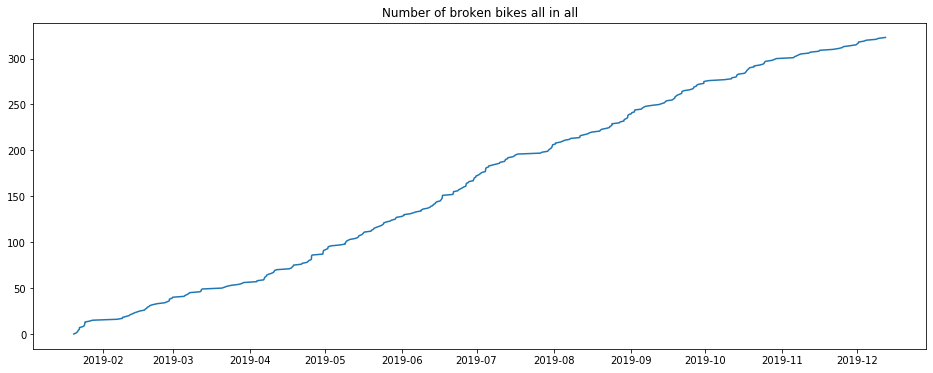

In [146]:
fig,ax = plt.subplots(figsize=(16,6))

ax.plot(duisburg_diff_true["cumulative_broken_bikes"])
ax.set_title("Number of broken bikes all in all")

plt.show()

The increase in broken bikes seems to be linear.

In [147]:
marburg = marburg.sort_values(['datetime'])
marburg = marburg.reset_index()
marburg

,datetime,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins
0,2019-01-20 00:04:00,2019-01-20,00:04:00,11181,marburg,"(50.7973, 8.7616)","(50.8081, 8.7753)",6,0,11
1,2019-01-20 00:08:00,2019-01-20,00:08:00,11126,marburg,"(50.7988, 8.7621)","(50.8132, 8.7759)",6,0,18
2,2019-01-20 00:08:00,2019-01-20,00:08:00,11103,marburg,"(50.7988, 8.7621)","(50.8045, 8.7704)",6,0,9
3,2019-01-20 00:25:00,2019-01-20,00:25:00,11113,marburg,"(50.8071, 8.7699)","(50.8047, 8.7592)",6,0,29
4,2019-01-20 00:36:00,2019-01-20,00:36:00,11126,marburg,"(50.8132, 8.7759)","(50.8132, 8.7633)",6,0,5
...,...,...,...,...,...,...,...,...,...,...
164052,2020-01-20 22:50:00,2020-01-20,22:50:00,11124,marburg,"(50.8165, 8.7792)","(50.8094, 8.7722)",0,22,9
164053,2020-01-20 23:06:00,2020-01-20,23:06:00,11297,marburg,"(50.8089, 8.773)","(50.82, 8.7737)",0,23,7
164054,2020-01-20 23:16:00,2020-01-20,23:16:00,11263,marburg,"(50.8016, 8.7597)","(50.7953, 8.762)",0,23,6
164055,2020-01-20 23:28:00,2020-01-20,23:28:00,11118,marburg,"(50.8133, 8.7733)","(50.8081, 8.7754)",0,23,6


In [148]:
marburg_diff = marburg.groupby(['b_number'], sort=False).apply(calc_length)
marburg_diff

,datetime,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff
0,2019-01-20 00:04:00,2019-01-20,00:04:00,11181,marburg,"(50.7973, 8.7616)","(50.8081, 8.7753)",6,0,11,-1 days +07:25:00
1,2019-01-20 00:08:00,2019-01-20,00:08:00,11126,marburg,"(50.7988, 8.7621)","(50.8132, 8.7759)",6,0,18,-1 days +23:32:00
2,2019-01-20 00:08:00,2019-01-20,00:08:00,11103,marburg,"(50.7988, 8.7621)","(50.8045, 8.7704)",6,0,9,-1 days +22:37:00
3,2019-01-20 00:25:00,2019-01-20,00:25:00,11113,marburg,"(50.8071, 8.7699)","(50.8047, 8.7592)",6,0,29,-1 days +09:05:00
4,2019-01-20 00:36:00,2019-01-20,00:36:00,11126,marburg,"(50.8132, 8.7759)","(50.8132, 8.7633)",6,0,5,-1 days +09:35:00
...,...,...,...,...,...,...,...,...,...,...,...
164052,2020-01-20 22:50:00,2020-01-20,22:50:00,11124,marburg,"(50.8165, 8.7792)","(50.8094, 8.7722)",0,22,9,NaT
164053,2020-01-20 23:06:00,2020-01-20,23:06:00,11297,marburg,"(50.8089, 8.773)","(50.82, 8.7737)",0,23,7,NaT
164054,2020-01-20 23:16:00,2020-01-20,23:16:00,11263,marburg,"(50.8016, 8.7597)","(50.7953, 8.762)",0,23,6,NaT
164055,2020-01-20 23:28:00,2020-01-20,23:28:00,11118,marburg,"(50.8133, 8.7733)","(50.8081, 8.7754)",0,23,6,NaT


In [154]:
# wir fuellen hier die NaT values auf mit dem letzten Datum, von dem wir Daten haben
marburg_diff = marburg_diff.apply(fill_NaT, axis=1)

In [155]:
marburg_diff['is_broken'] = marburg_diff['diff'] < timedelta(days=-28) 

In [156]:
marburg_diff

,datetime,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff,is_broken
0,2019-01-20 00:04:00,2019-01-20,00:04:00,11181,marburg,"(50.7973, 8.7616)","(50.8081, 8.7753)",6,0,11,-1 days +07:25:00,False
1,2019-01-20 00:08:00,2019-01-20,00:08:00,11126,marburg,"(50.7988, 8.7621)","(50.8132, 8.7759)",6,0,18,-1 days +23:32:00,False
2,2019-01-20 00:08:00,2019-01-20,00:08:00,11103,marburg,"(50.7988, 8.7621)","(50.8045, 8.7704)",6,0,9,-1 days +22:37:00,False
3,2019-01-20 00:25:00,2019-01-20,00:25:00,11113,marburg,"(50.8071, 8.7699)","(50.8047, 8.7592)",6,0,29,-1 days +09:05:00,False
4,2019-01-20 00:36:00,2019-01-20,00:36:00,11126,marburg,"(50.8132, 8.7759)","(50.8132, 8.7633)",6,0,5,-1 days +09:35:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
164052,2020-01-20 22:50:00,2020-01-20,22:50:00,11124,marburg,"(50.8165, 8.7792)","(50.8094, 8.7722)",0,22,9,01:10:00,False
164053,2020-01-20 23:06:00,2020-01-20,23:06:00,11297,marburg,"(50.8089, 8.773)","(50.82, 8.7737)",0,23,7,00:54:00,False
164054,2020-01-20 23:16:00,2020-01-20,23:16:00,11263,marburg,"(50.8016, 8.7597)","(50.7953, 8.762)",0,23,6,00:44:00,False
164055,2020-01-20 23:28:00,2020-01-20,23:28:00,11118,marburg,"(50.8133, 8.7733)","(50.8081, 8.7754)",0,23,6,00:32:00,False


In [157]:
marburg_diff = marburg_diff.set_index('datetime')
marburg_diff

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff,is_broken
datetime,,,,,,,,,,,
2019-01-20 00:04:00,2019-01-20,00:04:00,11181,marburg,"(50.7973, 8.7616)","(50.8081, 8.7753)",6,0,11,-1 days +07:25:00,False
2019-01-20 00:08:00,2019-01-20,00:08:00,11126,marburg,"(50.7988, 8.7621)","(50.8132, 8.7759)",6,0,18,-1 days +23:32:00,False
2019-01-20 00:08:00,2019-01-20,00:08:00,11103,marburg,"(50.7988, 8.7621)","(50.8045, 8.7704)",6,0,9,-1 days +22:37:00,False
2019-01-20 00:25:00,2019-01-20,00:25:00,11113,marburg,"(50.8071, 8.7699)","(50.8047, 8.7592)",6,0,29,-1 days +09:05:00,False
2019-01-20 00:36:00,2019-01-20,00:36:00,11126,marburg,"(50.8132, 8.7759)","(50.8132, 8.7633)",6,0,5,-1 days +09:35:00,False
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-20 22:50:00,2020-01-20,22:50:00,11124,marburg,"(50.8165, 8.7792)","(50.8094, 8.7722)",0,22,9,01:10:00,False
2020-01-20 23:06:00,2020-01-20,23:06:00,11297,marburg,"(50.8089, 8.773)","(50.82, 8.7737)",0,23,7,00:54:00,False
2020-01-20 23:16:00,2020-01-20,23:16:00,11263,marburg,"(50.8016, 8.7597)","(50.7953, 8.762)",0,23,6,00:44:00,False


In [158]:
marburg_diff.resample('h')['is_broken'].sum()

datetime
2019-01-20 00:00:00    0.0
2019-01-20 01:00:00    0.0
2019-01-20 02:00:00    0.0
2019-01-20 03:00:00    0.0
2019-01-20 04:00:00    0.0
                      ... 
2020-01-20 19:00:00    0.0
2020-01-20 20:00:00    0.0
2020-01-20 21:00:00    0.0
2020-01-20 22:00:00    0.0
2020-01-20 23:00:00    0.0
Freq: H, Name: is_broken, Length: 8784, dtype: float64

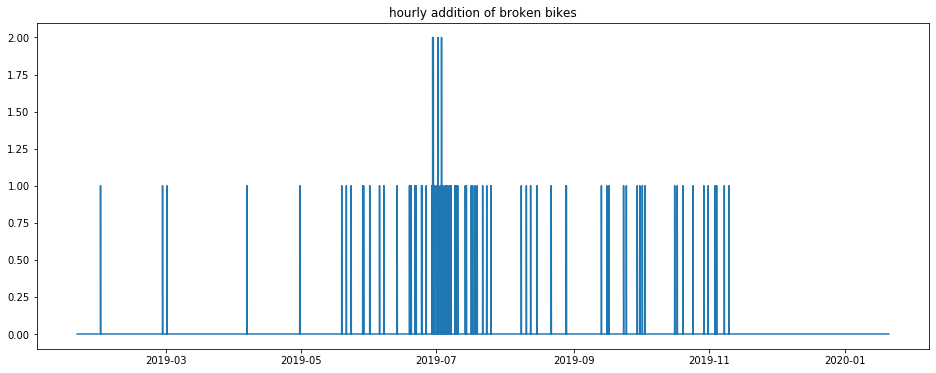

In [159]:

fig,ax = plt.subplots(figsize=(16,6))

ax.plot(marburg_diff.resample('h')['is_broken'].sum())
ax.set_title("hourly addition of broken bikes")

plt.show()

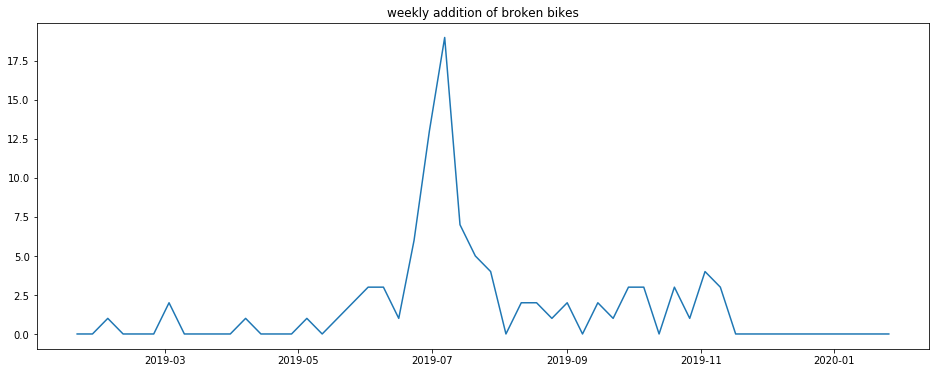

In [160]:

fig,ax = plt.subplots(figsize=(16,6))

ax.plot(marburg_diff.resample('w')['is_broken'].sum())
ax.set_title("weekly addition of broken bikes")

plt.show()

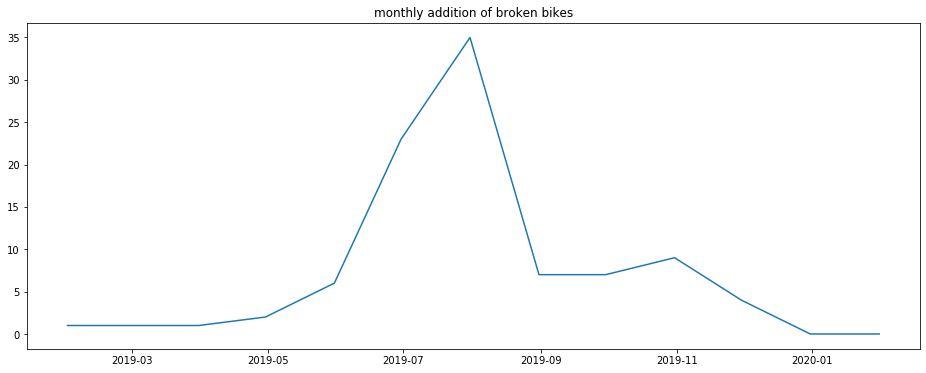

In [161]:

fig,ax = plt.subplots(figsize=(16,6))

ax.plot(marburg_diff.resample('m')['is_broken'].sum())
ax.set_title("monthly addition of broken bikes")

plt.show()

In [162]:
marburg_diff.resample('m')['is_broken'].sum()

datetime
2019-01-31     1.0
2019-02-28     1.0
2019-03-31     1.0
2019-04-30     2.0
2019-05-31     6.0
2019-06-30    23.0
2019-07-31    35.0
2019-08-31     7.0
2019-09-30     7.0
2019-10-31     9.0
2019-11-30     4.0
2019-12-31     0.0
2020-01-31     0.0
Freq: M, Name: is_broken, dtype: float64

_Which trends do you observe? How do you explain them?_

The Trend of the Bikes getting broken in a month in Marburg is low (<10) except in june and july. This could be corrolated with a higher utilization in the summer months. 

In [164]:
marburg_diff_true = marburg_diff[marburg_diff['is_broken']==True]
marburg_diff_true

,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff,is_broken
datetime,,,,,,,,,,,
2019-01-30 13:35:00,2019-01-30,13:35:00,11272,marburg,"(50.8362, 8.7568)","(50.8229, 8.7747)",2,13,23,-149 days +01:05:00,True
2019-02-27 12:02:00,2019-02-27,12:02:00,11261,marburg,"(50.8081, 8.7752)","(50.8128, 8.7806)",2,12,86,-36 days +21:33:00,True
2019-03-01 12:22:00,2019-03-01,12:22:00,11177,marburg,"(50.781, 8.7655)","(50.7904, 8.7669)",4,12,21,-55 days +23:31:00,True
2019-04-06 15:31:00,2019-04-06,15:31:00,11143,marburg,"(50.811, 8.7742)","(50.82, 8.7737)",5,15,8,-29 days +15:26:00,True
2019-04-30 09:56:00,2019-04-30,09:56:00,11177,marburg,"(50.7895, 8.7564)","(50.8229, 8.7747)",1,9,140,-29 days +15:30:00,True
...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 12:06:00,2019-10-31,12:06:00,11158,marburg,"(50.8161, 8.7722)","(50.7856, 8.7794)",3,12,27,-30 days +22:08:00,True
2019-11-03 15:40:00,2019-11-03,15:40:00,11079,marburg,"(50.82, 8.7737)","(50.7895, 8.7564)",6,15,18,-31 days +00:11:00,True
2019-11-04 08:43:00,2019-11-04,08:43:00,11276,marburg,"(50.7953, 8.762)","(50.7895, 8.7564)",0,8,8,-29 days +13:20:00,True


We can see that the mean hour where bikes are getting broken is at 5am in the morning. This could indicate that more people break bikes at nighttime.

In [165]:
marburg_diff["cumulative_broken_bikes"] = range(0,len(marburg_diff), 1)
marburg_diff

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,day,time,b_number,city,orig,dest,weekday,hour,trip_duration_mins,diff,is_broken,cumulative_broken_bikes
datetime,,,,,,,,,,,,
2019-01-30 13:35:00,2019-01-30,13:35:00,11272,marburg,"(50.8362, 8.7568)","(50.8229, 8.7747)",2,13,23,-149 days +01:05:00,True,0
2019-02-27 12:02:00,2019-02-27,12:02:00,11261,marburg,"(50.8081, 8.7752)","(50.8128, 8.7806)",2,12,86,-36 days +21:33:00,True,1
2019-03-01 12:22:00,2019-03-01,12:22:00,11177,marburg,"(50.781, 8.7655)","(50.7904, 8.7669)",4,12,21,-55 days +23:31:00,True,2
2019-04-06 15:31:00,2019-04-06,15:31:00,11143,marburg,"(50.811, 8.7742)","(50.82, 8.7737)",5,15,8,-29 days +15:26:00,True,3
2019-04-30 09:56:00,2019-04-30,09:56:00,11177,marburg,"(50.7895, 8.7564)","(50.8229, 8.7747)",1,9,140,-29 days +15:30:00,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 12:06:00,2019-10-31,12:06:00,11158,marburg,"(50.8161, 8.7722)","(50.7856, 8.7794)",3,12,27,-30 days +22:08:00,True,91
2019-11-03 15:40:00,2019-11-03,15:40:00,11079,marburg,"(50.82, 8.7737)","(50.7895, 8.7564)",6,15,18,-31 days +00:11:00,True,92
2019-11-04 08:43:00,2019-11-04,08:43:00,11276,marburg,"(50.7953, 8.762)","(50.7895, 8.7564)",0,8,8,-29 days +13:20:00,True,93


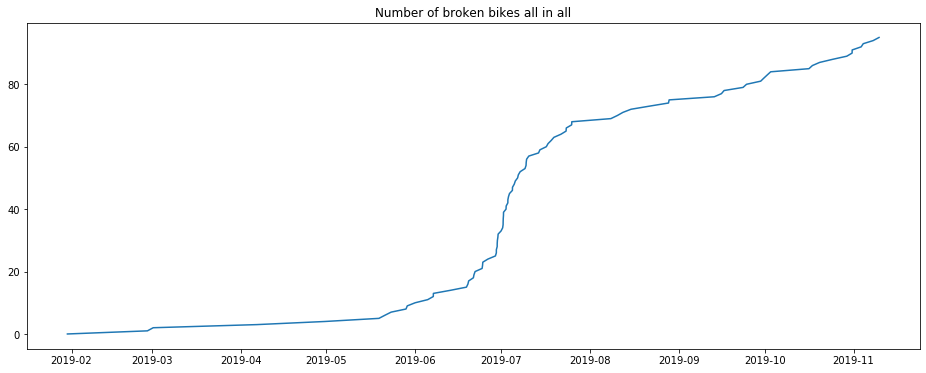

In [166]:
fig,ax = plt.subplots(figsize=(16,6))

ax.plot(marburg_diff["cumulative_broken_bikes"])
ax.set_title("Number of broken bikes all in all")

plt.show()

Again we can see the increase in broken bikes in Marburg seems to be way higher in june and july than in the other months where it is about the same increase.

_Find explanations for any differences between cities. Which city performs better/worse and why?_

Marburg all in all has less broken bikes. In Duisburg bikes are getting broken mostly all year whereas Marburg's bikes are getting often broken in the summer months.  
Marburg performs better maybe because it has less citizens (~ 80.000) than duisburg (~ 490.000).  
The high rise of broken bikes in the summer coul be backtraced to the bigger usage of bikes in the summer.